# 🤖 Bertopic with abstracts of *BioArxiv* 

In [1]:
#Directory
PATH_TO_DATA = r"C:\Users\jacob\OneDrive - Université Laval\DATA\\"
PATH_TO_VIZ = r"C:\Users\jacob\OneDrive - Université Laval\biophilo\Visualisation\\"
# Packages to import. 
import pandas as pd 
import numpy as np
import datamapplot


from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

## 📄 Data
This data is from *BioArxiv* journal from 2022 to 2024. I removed all the entries with no abstract. 


In [2]:
df_bio =  pd.read_csv(r"C:\Users\jacob\OneDrive - Université Laval\biophilo\Data\pybiblio\BIOLOGY\bioRxiv\articles_bioRxiv_reformat.csv")
df_bio

,...1,citing_id,citing_doi,pii,pubmed_id,citing_title,subtype,subtypeDescription,creator,afid,...,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,0,84929582121,10.1021/SB400206C,NaN,24621257.0,RAPIDLY CHARACTERIZING THE FAST DYNAMICS OF RN...,AR,ARTICLE,TAKAHASHI M.K.,60152345;60143895;60137962;60104946;60089893;6...,...,503-515,RNA regulators are emerging as powerful tools ...,CELL-FREE | RESPONSE TIME | RNA GENETIC CIRCUI...,124,1,REPOSITORYAM,GREEN,NSF,1144153,NATIONAL SCIENCE FOUNDATION
1,1,84903726447,10.1093/BIOINFORMATICS/BTU121,NaN,24603985.0,PYRAD: ASSEMBLY OF DE NOVO RADSEQ LOCI FOR PHY...,AR,ARTICLE,EATON D.,60030002;60029278,...,1844-1849,Motivation: Restriction-site-associated genomi...,NaN,594,1,REPOSITORYAM,GREEN,NaN,UNDEFINED,NaN
2,2,84908073394,10.1186/2047-217X-3-3,NaN,NaN,A DATA REPOSITORY AND ANALYSIS FRAMEWORK FOR S...,AR,ARTICLE,EGLEN S.,60031101;60026712;60016418;60010719;60006222,...,NaN,"Background: During early development, neural c...",ELECTROPHYSIOLOGY | HDF5 | MULTIELECTRODE ARRA...,24,1,REPOSITORYAM,GREEN,EPSRC,083205,ENGINEERING AND PHYSICAL SCIENCES RESEARCH COU...
3,3,84904251189,10.1371/JOURNAL.PONE.0090714,NaN,24651479.0,HIGH GENETIC DIVERSITY AND ADAPTIVE POTENTIAL ...,AR,ARTICLE,BAILEY A.L.,60153202;60071676;60032179;60025553;60018179;6...,...,NaN,Key biological properties such as high genetic...,NaN,36,1,REPOSITORYAM,GREEN,OD,P51OD011106,NIH OFFICE OF THE DIRECTOR
4,4,84898619383,10.1371/JOURNAL.PONE.0091768,NaN,24651046.0,DECIPHERING THE MECHANISM OF Β-AMINOBUTYRIC AC...,AR,ARTICLE,CAO H.H.,60031041,...,NaN,The non-protein amino acid β-aminobutyric acid...,NaN,37,1,REPOSITORYAM,GREEN,NaN,UNDEFINED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134761,134761,85183897401,10.1038/S41467-024-45024-5,NaN,38296951.0,CONTSCOUT: SENSITIVE DETECTION AND REMOVAL OF ...,AR,ARTICLE,BÁLINT B.,60212127;60026434;60025038;60014567,...,NaN,Contamination of genomes is an increasingly re...,NaN,8,1,REPOSITORYVOR,GREEN,JGI,758161,JOINT GENOME INSTITUTE
134762,134762,85198988259,10.1371/JOURNAL.PBIO.3002711,NaN,39008532.0,COLLECTIVE PEROXIDE DETOXIFICATION DETERMINES ...,AR,ARTICLE,GREEN R.,60172345;60172343;60016848,...,NaN,Mutagenesis is responsive to many environmenta...,NaN,0,1,REPOSITORYVOR,GREEN,BBSRC,BB/T008725/1,BIOTECHNOLOGY AND BIOLOGICAL SCIENCES RESEARCH...
134763,134763,85192109484,10.1016/J.VACCINE.2024.04.073,S0264410X24005140,38704253.0,EVALUATION OF THE PRECISION OF THE PLASMODIUM ...,AR,ARTICLE,MERTENS J.E.,60172675;60123796;60031331;60026851;60017336;6...,...,3621-3629,Recent data indicate increasing disease burden...,BLOOD-STAGE MALARIA ANTIGEN | GROWTH INHIBITIO...,0,1,REPOSITORYVOR,GREEN,NIAID,UNDEFINED,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...
134764,134764,85181741708,10.1002/JEZ.B.23236,NaN,38192038.0,3D SPHEROID CULTURING OF ASTYANAX MEXICANUS LI...,AR,ARTICLE,BISWAS T.,60028793;60009084,...,301-312,In vitro assays are crucial tools for gaining ...,3D CULTURING | ADAPTATION | ASTYANAX MEXICANUS...,2,1,PUBLISHERHYBRIDGOLD,HYBRID GOLD,NSF,1923372,NATIONAL SCIENCE FOUNDATION


In [3]:
df_bio = df_bio.fillna("NULL")
df_bio_cleaned = df_bio[df_bio['description'] != 'NULL']
df_bio_cleaned

,...1,citing_id,citing_doi,pii,pubmed_id,citing_title,subtype,subtypeDescription,creator,afid,...,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,0,84929582121,10.1021/SB400206C,NULL,24621257.0,RAPIDLY CHARACTERIZING THE FAST DYNAMICS OF RN...,AR,ARTICLE,TAKAHASHI M.K.,60152345;60143895;60137962;60104946;60089893;6...,...,503-515,RNA regulators are emerging as powerful tools ...,CELL-FREE | RESPONSE TIME | RNA GENETIC CIRCUI...,124,1,REPOSITORYAM,GREEN,NSF,1144153,NATIONAL SCIENCE FOUNDATION
1,1,84903726447,10.1093/BIOINFORMATICS/BTU121,NULL,24603985.0,PYRAD: ASSEMBLY OF DE NOVO RADSEQ LOCI FOR PHY...,AR,ARTICLE,EATON D.,60030002;60029278,...,1844-1849,Motivation: Restriction-site-associated genomi...,NULL,594,1,REPOSITORYAM,GREEN,NULL,UNDEFINED,NULL
2,2,84908073394,10.1186/2047-217X-3-3,NULL,NULL,A DATA REPOSITORY AND ANALYSIS FRAMEWORK FOR S...,AR,ARTICLE,EGLEN S.,60031101;60026712;60016418;60010719;60006222,...,NULL,"Background: During early development, neural c...",ELECTROPHYSIOLOGY | HDF5 | MULTIELECTRODE ARRA...,24,1,REPOSITORYAM,GREEN,EPSRC,083205,ENGINEERING AND PHYSICAL SCIENCES RESEARCH COU...
3,3,84904251189,10.1371/JOURNAL.PONE.0090714,NULL,24651479.0,HIGH GENETIC DIVERSITY AND ADAPTIVE POTENTIAL ...,AR,ARTICLE,BAILEY A.L.,60153202;60071676;60032179;60025553;60018179;6...,...,NULL,Key biological properties such as high genetic...,NULL,36,1,REPOSITORYAM,GREEN,OD,P51OD011106,NIH OFFICE OF THE DIRECTOR
4,4,84898619383,10.1371/JOURNAL.PONE.0091768,NULL,24651046.0,DECIPHERING THE MECHANISM OF Β-AMINOBUTYRIC AC...,AR,ARTICLE,CAO H.H.,60031041,...,NULL,The non-protein amino acid β-aminobutyric acid...,NULL,37,1,REPOSITORYAM,GREEN,NULL,UNDEFINED,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134761,134761,85183897401,10.1038/S41467-024-45024-5,NULL,38296951.0,CONTSCOUT: SENSITIVE DETECTION AND REMOVAL OF ...,AR,ARTICLE,BÁLINT B.,60212127;60026434;60025038;60014567,...,NULL,Contamination of genomes is an increasingly re...,NULL,8,1,REPOSITORYVOR,GREEN,JGI,758161,JOINT GENOME INSTITUTE
134762,134762,85198988259,10.1371/JOURNAL.PBIO.3002711,NULL,39008532.0,COLLECTIVE PEROXIDE DETOXIFICATION DETERMINES ...,AR,ARTICLE,GREEN R.,60172345;60172343;60016848,...,NULL,Mutagenesis is responsive to many environmenta...,NULL,0,1,REPOSITORYVOR,GREEN,BBSRC,BB/T008725/1,BIOTECHNOLOGY AND BIOLOGICAL SCIENCES RESEARCH...
134763,134763,85192109484,10.1016/J.VACCINE.2024.04.073,S0264410X24005140,38704253.0,EVALUATION OF THE PRECISION OF THE PLASMODIUM ...,AR,ARTICLE,MERTENS J.E.,60172675;60123796;60031331;60026851;60017336;6...,...,3621-3629,Recent data indicate increasing disease burden...,BLOOD-STAGE MALARIA ANTIGEN | GROWTH INHIBITIO...,0,1,REPOSITORYVOR,GREEN,NIAID,UNDEFINED,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...
134764,134764,85181741708,10.1002/JEZ.B.23236,NULL,38192038.0,3D SPHEROID CULTURING OF ASTYANAX MEXICANUS LI...,AR,ARTICLE,BISWAS T.,60028793;60009084,...,301-312,In vitro assays are crucial tools for gaining ...,3D CULTURING | ADAPTATION | ASTYANAX MEXICANUS...,2,1,PUBLISHERHYBRIDGOLD,HYBRID GOLD,NSF,1923372,NATIONAL SCIENCE FOUNDATION


In [4]:
docs = df_bio_cleaned.description.to_list()
columns_to_combine = ['citing_authors', 'citing_year', 'citing_title']

df_bio_cleaned['combined'] = df_bio_cleaned[columns_to_combine].apply(lambda row: ', '.join(map(str, row)), axis=1)
#node_text = df_bio_cleaned.to_list()


## 🌌 BERTopic model

In [5]:
# Pre-calculate embeddings
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors= 150, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

Batches:   0%|          | 0/4193 [00:00<?, ?it/s]

SystemError: CPUDispatcher(<function nn_descent at 0x0000024FB2AD5760>) returned a result with an exception set

In [ ]:
# Define sub-models
from hdbscan import HDBSCAN
from umap import UMAP
umap_model = UMAP(n_neighbors=150, n_components=2, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

## Visualisation with datamapplot

In [ ]:
# Define a custom list of stopwords (or use an extended one)
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(
  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  #representation_model=representation_model,
  vectorizer_model=vectorizer_model,
  
  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(docs, embeddings)


2025-02-21 10:25:08,791 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-21 10:25:25,807 - BERTopic - Dimensionality - Completed ✓
2025-02-21 10:25:25,808 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-21 10:25:25,931 - BERTopic - Cluster - Completed ✓
2025-02-21 10:25:25,937 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-21 10:25:26,606 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.visualize_heatmap()

In [ ]:
# Count how many are labeled -1 (outliers)

topic_info = topic_model.get_topic_info()
outlier_count = topic_info[topic_info['Topic'] == -1]['Count'].values[0]
print(f"Number of outliers: {outlier_count}")

In [ ]:
x = topic_model.get_document_info(docs)
y = x.Name
labels =y.values

labels.shape
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1099,-1_cell_cells_gene_protein,"[cell, cells, gene, protein, data, genes, usin...",[A proteins genetic architecture - the set of ...
1,0,1072,0_brain_neurons_neural_activity,"[brain, neurons, neural, activity, cortex, cor...",[Decoding of brain tasks aims to identify indi...
2,1,754,1_protein_proteins_binding_dna,"[protein, proteins, binding, dna, structure, c...",[Protein-protein interactions (PPIs) are cruci...
3,2,676,2_cell_cells_cancer_tumor,"[cell, cells, cancer, tumor, data, expression,...",[The function of mammalian cells is largely in...
4,3,420,3_species_population_populations_selection,"[species, population, populations, selection, ...",[O_LIFunctional traits affect the demographic ...
5,4,298,4_mice_muscle_cells_cell,"[mice, muscle, cells, cell, tissue, expression...",[Skeletal muscle regeneration requires the hig...
6,5,208,5_plant_plants_root_genes,"[plant, plants, root, genes, genetic, arabidop...",[Beneficial interactions with microorganisms a...
7,6,120,6_cov_sars_covid_19,"[cov, sars, covid, 19, spike, omicron, variant...",[The COVID-19 pandemic is a widespread and dea...
8,7,73,7_virus_mosquito_species_host,"[virus, mosquito, species, host, mosquitoes, v...",[Mosquito-borne diseases are a major global pu...
9,8,69,8_microbiota_gut_microbiome_intestinal,"[microbiota, gut, microbiome, intestinal, asso...",[Microbiome research has gained much attention...


In [12]:
x = topic_model.get_document_info(docs)
y = x.Name
labels =y.values
labels.shape

topic_info = topic_model.get_topic_info()
excluded_topic = str(topic_info.Name[0]) 
clean_labels= [item.replace(excluded_topic, "Unlabelled") for item in labels] # To exclude -1 topic which is typically noise. 

In [23]:
x

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"BackgroundBerberine, which is a naturally occu...",4,4_mice_muscle_cells_cell,"[mice, muscle, cells, cell, tissue, expression...",[Skeletal muscle regeneration requires the hig...,mice - muscle - cells - cell - tissue - expres...,1.000000,False
1,The bench-to-bedside development of pro-cognit...,0,0_brain_neurons_neural_activity,"[brain, neurons, neural, activity, cortex, cor...",[Decoding of brain tasks aims to identify indi...,brain - neurons - neural - activity - cortex -...,1.000000,False
2,Marine bacteria rely on phytoplankton exudates...,11,11_microbial_marine_community_ocean,"[microbial, marine, community, ocean, bacteria...",[Deep-sea hydrothermal vents are abundant on t...,microbial - marine - community - ocean - bacte...,1.000000,False
3,"We analyse a multiphase, moving boundary model...",-1,-1_cell_cells_gene_protein,"[cell, cells, gene, protein, data, genes, usin...",[A proteins genetic architecture - the set of ...,cell - cells - gene - protein - data - genes -...,0.000000,False
4,Foamy viruses (FVs) constitute a subfamily of ...,-1,-1_cell_cells_gene_protein,"[cell, cells, gene, protein, data, genes, usin...",[A proteins genetic architecture - the set of ...,cell - cells - gene - protein - data - genes -...,0.000000,False
...,...,...,...,...,...,...,...,...
4989,Are animals preferences determined by absolute...,3,3_species_population_populations_selection,"[species, population, populations, selection, ...",[O_LIFunctional traits affect the demographic ...,species - population - populations - selection...,0.826212,False
4990,"Dendritic spines have diverse morphologies, wi...",0,0_brain_neurons_neural_activity,"[brain, neurons, neural, activity, cortex, cor...",[Decoding of brain tasks aims to identify indi...,brain - neurons - neural - activity - cortex -...,1.000000,False
4991,Metastasizing cancer cells encounter a multitu...,2,2_cell_cells_cancer_tumor,"[cell, cells, cancer, tumor, data, expression,...",[The function of mammalian cells is largely in...,cell - cells - cancer - tumor - data - express...,1.000000,False
4992,Accurate localization of single particles play...,1,1_protein_proteins_binding_dna,"[protein, proteins, binding, dna, structure, c...",[Protein-protein interactions (PPIs) are cruci...,protein - proteins - binding - dna - structure...,1.000000,False


The code below is to add additional information like the citation count of each papers and also their keywords.

For more informations about how to integrate and style this information, consult https://datamapplot.readthedocs.io/en/latest/ and the according *Github*.

In [55]:
df_bio_cleaned.preprint_category

50725          bioinformatics
50443            biochemistry
40867            microbiology
40500           plant biology
14002                genomics
                 ...         
311                  genomics
7381                 genetics
10238          cancer biology
25045          bioinformatics
17994    evolutionary biology
Name: preprint_category, Length: 4995, dtype: object

<InteractiveFigure width=100% height=800>
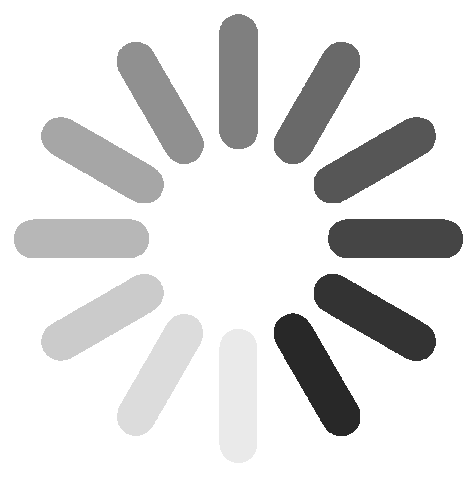

In [21]:
#import datamapplot.selection_handlers

plot = datamapplot.create_interactive_plot(
    reduced_embeddings,
    clean_labels,
    #hover_text=node_text,
    font_family="Cinzel",
    enable_search=True,
    #inline_data=False,
    initial_zoom_fraction=0.9,
    colormap_rawdata = [df_bio_cleaned.preprint_category],
    colormap_metadata=[
        {"field": "field", "description": "Primary Field", "cmap": "viridis", "kind": "categorical", "n_colors": 30, "show_legend": True}
    ]
    #offline_data_prefix="cord-large-cmaps-1",
    #marker_size_array=marker_size_array,
    #selection_handler=datamapplot.selection_handlers.DisplaySample(n_samples=25)
)
plot

In [22]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, reduced_embeddings=reduced_embeddings)

100%|██████████| 13/13 [00:00<00:00, 275.98it/s]


In [43]:

# Use the countries list from the input document
countries = np.array(df_cleaned.affiliation_country)


def get_continent(country):
    continents = {
        'North America': ['United States', 'Canada', 'Mexico'],
        'South America': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Uruguay', 'Venezuela'],
        'Europe': ['United Kingdom', 'Germany', 'France', 'Spain', 'Italy', 'Netherlands', 'Poland', 
                   'Croatia', 'Czech Republic', 'Denmark', 'Romania', 'Austria', 'Belgium', 'Greece', 
                   'Ireland', 'Norway', 'Portugal', 'Russian Federation', 'Slovakia', 'Sweden', 'Switzerland', 
                   'Hungary', 'Finland', 'Luxembourg', 'Estonia', 'Lithuania', 'Slovenia', 'Iceland', 'Serbia', 'Cyprus'],
        'Asia': ['China', 'Israel', 'United Arab Emirates', 'Japan', 'Turkey', 'Kazakhstan', 
                 'Bangladesh', 'Malaysia', 'India', 'Pakistan', 'Taiwan', 'Singapore', 'South Korea', 
                 'Hong Kong', 'Indonesia', 'Philippines'],
        'Africa': ['Sierra Leone', 'South Africa', 'Kenya', 'Egypt'],
        'Oceania': ['Australia', 'New Zealand']
    }
    
    # If multiple countries are listed, check for unique countries
    unique_countries = set(country.split(';'))
    
    # Handle NULL or empty cases
    if 'NULL' in unique_countries or len(unique_countries) == 0:
        return 'Unknown'
    
    # If multiple unique countries
    if len(unique_countries) > 1:
        return 'Collaboration'
    
    # If only one unique country
    country_name = list(unique_countries)[0]
    for continent, countries in continents.items():
        if country_name in countries:
            return continent
    return 'Unknown'

# Create original DataFrame
df_countries = pd.DataFrame({'Original Countries': countries})

# Add Continent column
df_countries['Continent'] = df_countries['Original Countries'].apply(get_continent)

print(df_countries)
print(f"\nTotal entries: {len(df_countries)}")
print(f"Breakdown by continent:\n{df_countries['Continent'].value_counts()}")

             Original Countries      Continent
0                       Belgium         Europe
1                Belgium;Norway  Collaboration
2                  Poland;Italy  Collaboration
3                 United States  North America
4                        Poland         Europe
...                         ...            ...
6267  France;Switzerland;France  Collaboration
6268              United States  North America
6269                    Finland         Europe
6270              United States  North America
6271                     Canada  North America

[6272 rows x 2 columns]

Total entries: 6272
Breakdown by continent:
Continent
North America    2352
Europe           2132
Collaboration     872
Asia              284
Unknown           265
Oceania           265
South America      81
Africa             21
Name: count, dtype: int64


In [ ]:
df_cleaned["coverDate"] = pd.to_datetime(df_cleaned["coverDate"])
date = pd.array(df_cleaned.coverDate)

journal_top = df_cleaned
top_10_journals = journal_top["publicationName"].value_counts().nlargest(10).index

In [ ]:
# Replace journal names not in the top 10 with "Not in top 10"
journal_top["publicationName"] = journal_top["publicationName"].where(journal_top["publicationName"].isin(top_10_journals), "Not in top 10")


In [49]:
import sklearn.feature_extraction.text
import string

class WordCloud (datamapplot.selection_handlers.SelectionHandlerBase):

    def __init__(self, n_words=256, width=300, height=400, stop_words=None, **kwargs):
        super().__init__(
            dependencies=[
                "https://d3js.org/d3.v6.min.js",
                "https://unpkg.com/d3-cloud@1.2.7/build/d3.layout.cloud.js",
            ],
            **kwargs
        )
        self.n_words = n_words
        self.width = width
        self.height = height
        self.stop_words = stop_words or list(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS)

    @property
    def javascript(self):
        return f"""
const _STOPWORDS = new Set({self.stop_words});
const svg = d3.select("#word-cloud").append("svg")
    .attr("width", {self.width})
    .attr("height", {self.height})
    .append("g")
    .attr("transform", "translate(" + {self.width} / 2 + "," + {self.height} / 2 + ")");
const wordCloudItem = document.getElementById("word-cloud");

function wordCounter(textItems) {{
    // Split words
    const words = textItems.join(' ').toLowerCase().split(/\s+/);

    // Count unique words
    const wordCounts = new Map();
    words.forEach(word => {{
        wordCounts.set(word, (wordCounts.get(word) || 0) + 1);
    }});

    // Remove stopwords, trim to the top words and rescale
    _STOPWORDS.forEach(stopword => wordCounts.delete(stopword));
    const result = Array.from(wordCounts, ([word, frequency]) => ({{ text: word, size: Math.sqrt(frequency) }}))
                        .sort((a, b) => b.size - a.size).slice(0, {self.n_words});
    const maxSize = Math.max(...(result.map(x => x.size)));
    return result.map(({{text, size}}) => ({{ text: text, size: (size / maxSize)}}));
}}

function generateWordCloud(words) {{
  const width = {self.width};
  const height = {self.height};

  // Configure a cloud layout
  const layout = d3.layout.cloud()
    .size([width, height])
    .words(words.map(d => ({{text: d.text, size: 5 + d.size * width / 10}})))
    .rotate(() => 0)
    .fontSize(d => d.size)
    .font("Impact")
    .on("end", draw);

  layout.start();

  function draw(words) {{
    // Update existing words
    const text = svg.selectAll("text")
      .data(words, d => d.text);

    // Remove old words
    text.exit()
      .remove();

    // Add new words
    text.enter()
      .append("text")
      .attr("text-anchor", "middle")
      .text(d => d.text)
      .merge(text)
      .attr("transform", d => "translate(" + [d.x, d.y] + ")rotate(" + d.rotate + ")")
      .attr("font-size", d => d.size)
      .attr("font-family", "Impact");
  }}
}}

function lassoSelectionCallback(selectedPoints) {{
    const selectedText = selectedPoints.map(i => datamap.metaData.hover_text[i]);
    const wordCounts = wordCounter(selectedText);
    generateWordCloud(wordCounts);
}}
        """

    @property
    def html(self):
        return """<div id="word-cloud" class="container-box"></div>"""

    @property
    def css(self):
        return f"""
#word-cloud {{
    position: absolute;
    right: 0;
    bottom: 0;
    width: {self.width}px;
    height: {self.height}px;
    font-family: Impact;
    z-index: 10;
}}
"""

In [103]:
plot = datamapplot.create_interactive_plot(
    reduced_embeddings,
    clean_labels,
    hover_text= node_text,
    font_family="Cinzel",
    enable_search=True,
    #inline_data=False,
    initial_zoom_fraction=0.9,
    #offline_data_prefix="cord-large-cmaps-1",
    extra_point_data= add_info,
    hover_text_html_template = hover_text_template,
    marker_size_array=marker_size_array,
    #selection_handler=datamapplot.selection_handlers.DisplaySample(n_samples=25),
    colormaps={"Collaboration": df_countries.Continent, "Type": df_cleaned.subtypeDescription, "Journal": journal_top.publicationName},
    histogram_data = df_cleaned.coverDate,
    title = f"Philosophy of Biology",  
    sub_title= f"From <i>PhilPapers</i> (n = 9,969)",
    histogram_n_bins = 35,
    histogram_settings={
    "histogram_log_scale":False,
        "histogram_title":"Publication Year",
        "histogram_bin_fill_color":"#282a36",
        "histogram_bin_unselected_fill_color":"#b5b5b9",
        "histogram_bin_selected_fill_color":"#f68571",
        "histogram_width":400,
        "histogram_height":75,
    },
    selection_handler=datamapplot.selection_handlers.WordCloud(256, width=500, height=300, font_family="Cinzel", color_scale="viridis_r", n_rotations=0)
    
)
plot


ValueError: Length of values (6272) does not match length of index (16272)

In [133]:
timestamps = df_cleaned.coverDate.to_list()
topics_over_time = topic_model.topics_over_time(docs, timestamps, nr_bins= 100)
topics_over_time


topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=5)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=5)

ValueError: All arrays must be of the same length

## Save the map

In [39]:
plot.save(PATH_TO_VIZ + "PHILPAPERS_all_philo_of_biology_articles_BERTopic.html")


## LLama

In [2]:
from llama_cpp import Llama

# Use llama.cpp to load in a Quantized LLM
llm = Llama(model_path="C:/Users/jacob/OneDrive/Bureau/openhermes-2.5-mistral-7b.Q4_K_M.gguf", n_gpu_layers=-1, n_ctx=4096, stop=["Q:", "\n"])

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from C:/Users/jacob/OneDrive/Bureau/openhermes-2.5-mistral-7b.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = teknium_openhermes-2.5-mistral-7b
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_load

In [1]:
from bertopic.representation import KeyBERTInspired, LlamaCPP

prompt = """ Q:
I have a topic that contains the following keywords: '[KEYWORDS]'.

Based on the above information, can you give a short label of the topic of at most 5 words?
A:
"""

representation_model = {
    "KeyBERT": KeyBERTInspired(),
    "LLM": LlamaCPP(llm, prompt=prompt),
}

NameError: name 'llm' is not defined

In [5]:
# Pre-calculate embeddings
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer('BAAI/bge-small-en')
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors=150, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

NameError: name 'docs' is not defined

In [4]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Define a custom list of stopwords (or use an extended one)
custom_stopwords = ["the", "and", "or", "in", "on", "at", "of", "is", "to", "be", "with", "are", "that", "this", "by", "for"]

# Create a CountVectorizer with the custom stopwords
vectorizer = CountVectorizer(stop_words=custom_stopwords)



topic_model = BERTopic(
  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,
  vectorizer_model=vectorizer,
  
  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(docs, embeddings)

NameError: name 'embedding_model' is not defined

# Biology from BioArxiv

In [2]:
#Directory
PATH_TO_DATA = r"C:\Users\jacob\OneDrive - Université Laval\DATA\\"
PATH_TO_VIZ = r"C:\Users\jacob\OneDrive - Université Laval\biophilo\Visualisation\\"
# Packages to import. 
import pandas as pd 
import numpy as np
import datamapplot


from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

In [5]:
#df = pd.read_csv("C:\\Users\\jacob\\OneDrive - Université Laval\\biophilo\\Data\\PHILOSOPHY_OF_BIOLOGY_ALL.csv")


#test
df = pd.read_csv("C:/Users/jacob/OneDrive - Université Laval/biophilo/Data/BIO_ARXIV_DATA/all_bio_arxiv.csv")
df = df.fillna("NULL")

In [6]:
df_cleaned  = df[df['preprint_abstract'] != 'NULL']
#df_cleaned  = df_cleaned[df_cleaned['subtypeDescription'] == 'Article']
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

,preprint_doi,published_doi,published_journal,preprint_platform,preprint_title,preprint_authors,preprint_category,preprint_date,published_date,preprint_abstract,preprint_author_corresponding,preprint_author_corresponding_institution
0,10.1101/001081,10.1093/bioinformatics/btu121,Bioinformatics,bioRxiv,PyRAD: assembly of de novo RADseq loci for phy...,Deren A. R. Eaton;,Bioinformatics,2013-12-03,2014-03-05,Restriction-site associated genomic markers ar...,Deren A. R. Eaton,University of Chicago
1,10.1101/001297,10.1371/journal.pone.0085203,PLOS ONE,bioRxiv,Aerodynamic characteristics of a feathered din...,Dennis Evangelista;Griselda Cardona;Eric Guent...,Biophysics,2013-12-10,2014-01-15,We report the effects of posture and morpholog...,Dennis Evangelista,UC Berkeley
2,10.1101/000422,10.3389/fgene.2014.00013,Frontiers in Genetics,bioRxiv,On the optimal trimming of high-throughput mRN...,Matthew D MacManes;,Bioinformatics,2013-11-14,2014-01-31,The widespread and rapid adoption of high-thro...,Matthew D MacManes,University of New Hampshire
3,10.1101/001396,10.1162/NECO_a_00568,Neural Computation,bioRxiv,Parametric inference in the large data limit u...,Justin B. Kinney;Gurinder S. Atwal;,Biophysics,2013-12-13,2014-03-10,Motivated by data-rich experiments in transcri...,Justin B. Kinney,Cold Spring Harbor Laboratory
4,10.1101/002980,10.1016/j.bpj.2014.01.012,Biophysical Journal,bioRxiv,Genetic drift suppresses bacterial conjugation...,Peter D. Freese;Kirill S. Korolev;Jose I Jimen...,Biophysics,2014-02-24,2014-02-18,Conjugation is the primary mechanism of horizo...,Irene A. Chen,Univ. of California - Santa Barbara
...,...,...,...,...,...,...,...,...,...,...,...,...
256833,10.1101/2023.05.11.540369,10.1073/pnas.2309306120,Proceedings of the National Academy of Sciences,bioRxiv,RAD51-mediated R-loop formation acts to repair...,"Girasol, M. J.; Krasilnikova, M.; Marques, C. ...",microbiology,2023-05-11,2023-11-21,RNA-DNA hybrids are epigenetic features of all...,Richard McCulloch,University of Glasgow
256834,10.1101/2023.06.09.544423,10.1002/jez.b.23236,Journal of Experimental Zoology Part B: Molecu...,bioRxiv,3D spheroid culturing of Astyanax mexicanus li...,"Biswas, T.; Rajendran, N.; Hassan, H.; Zhao, C...",evolutionary biology,2023-06-10,2024-01-08,In vitro assays are crucial tools for gaining ...,Nicolas Rohner,"Stowers Institute for Medical Research, Univer..."
256835,10.1101/2024.01.23.576905,10.1016/j.vaccine.2024.04.073,Vaccine,bioRxiv,Evaluation of Precision of the Plasmodium know...,"Mertens, J. E.; Rigby, C. A.; Bardelli, M.; Qu...",immunology,2024-01-24,2024-05-03,Recent data indicate increasing disease burden...,Kazutoyo Miura,NIAID/NIH
256836,10.1101/2023.09.27.557722,10.1371/journal.pbio.3002711,PLOS Biology,bioRxiv,Working together to control mutation: how coll...,"Green, R.; Wang, H.; Botchey, C.; Zhang, N.; W...",evolutionary biology,2023-09-27,2024-07-15,Mutagenesis is responsive to many environmenta...,Christopher G. Knight,University of Manchester


In [8]:
docs = df_cleaned.preprint_abstract.to_list()

df_cleaned['preprint_date'] = pd.to_datetime(df_cleaned['preprint_date'])
df_cleaned['year'] = df_cleaned['preprint_date'].dt.year

columns_to_combine = ['preprint_authors', 'year', 'preprint_title']
df_cleaned['combined'] = df_cleaned[columns_to_combine].apply(lambda row: ', '.join(map(str, row)), axis=1)
node_text = df_cleaned.combined.to_list()

In [14]:
# Pre-calculate embeddings
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer('BAAI/bge-small-en')
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Pre-reduce embeddings for visualization purposes
#reduced_embeddings = UMAP(n_neighbors=150, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

Batches:   0%|          | 0/8027 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [12]:
# Define sub-models
from hdbscan import HDBSCAN
from umap import UMAP
umap_model = UMAP(n_neighbors=100, n_components=2, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=100, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [13]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Define a custom list of stopwords (or use an extended one)
custom_stopwords = ["the", "and", "or", "in", "on", "at", "of", "is", "to", "be", "with", "are", "that", "this", "by", "for"]

# Create a CountVectorizer with the custom stopwords
vectorizer = CountVectorizer(stop_words=custom_stopwords)



topic_model = BERTopic(
  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  #representation_model=representation_model,
  vectorizer_model=vectorizer,
  
  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(docs, embeddings)

NameError: name 'embeddings' is not defined